In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import numpy as np
import matplotlib.pyplot as plt

# Wrap to PBC

In [3]:
molsys = msm.convert(msm.systems['two LJ particles']['traj_two_lj_particles.trjpk'],
                     to_form='molsysmt.StructuresDict')

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


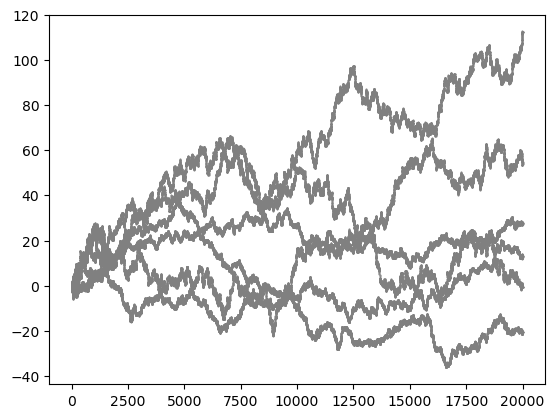

In [4]:
for particle, coordinate in [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]:
    plt.scatter(molsys['time'], molsys['coordinates'][:, particle, coordinate], s=1, color='gray', marker='.')
plt.show()

In [5]:
distance = msm.structure.get_distances(molsys, selection=0, selection_2=1, pbc=False)

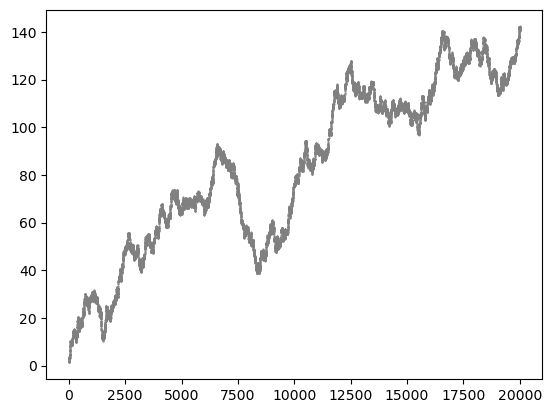

In [6]:
plt.scatter(molsys['time'], distance[:,0,0], s=1, color='gray', marker='.')
plt.show()

In [7]:
msm.get(molsys, box=True)

Magnitude,[[[3.0 0.0 0.0] [0.0 3.0 0.0] [0.0 0.0 3.0]] [[3.0 0.0 0.0] [0.0 3.0 0.0] [0.0 0.0 3.0]] [[3.0 0.0 0.0] [0.0 3.0 0.0] [0.0 0.0 3.0]] ... [[3.0 0.0 0.0] [0.0 3.0 0.0] [0.0 0.0 3.0]] [[3.0 0.0 0.0] [0.0 3.0 0.0] [0.0 0.0 3.0]] [[3.0 0.0 0.0] [0.0 3.0 0.0] [0.0 0.0 3.0]]]
Units,nanometer


In [8]:
distance = msm.structure.get_distances(molsys, selection=0, selection_2=1, pbc=True)

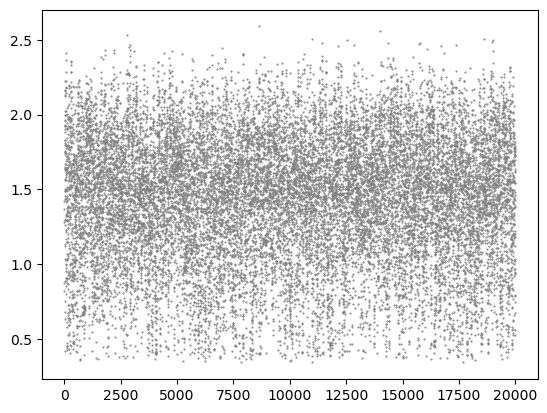

In [9]:
plt.scatter(molsys['time'], distance[:,0,0], s=1, color='gray', marker='.')
plt.show()

In [10]:
molsys_wrapped = msm.pbc.wrap_to_pbc(molsys)

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


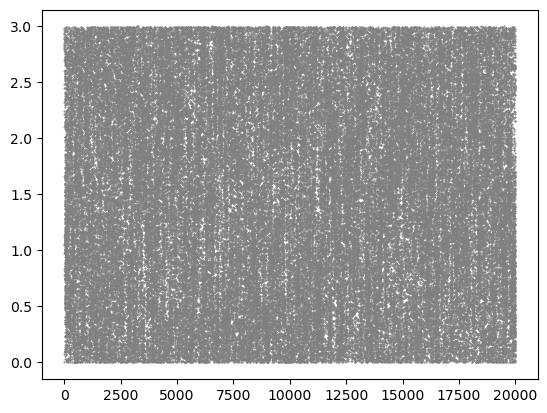

In [11]:
for particle, coordinate in [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]:
    plt.scatter(molsys_wrapped['time'], molsys_wrapped['coordinates'][:, particle, coordinate], s=1, color='grey', marker='.')
plt.show()

In [12]:
distance_wrapped = msm.structure.get_distances(molsys_wrapped, selection=0, selection_2=1, pbc=True)

In [13]:
np.allclose(distance[:,:,:], distance_wrapped[:,:,:])

True

In [14]:
molecular_system = msm.convert('pdb_id:1vii', to_form='molsysmt.MolSys')
molecular_system = msm.remove(molecular_system, selection='atom_type=="H"')
molecular_system = msm.build.add_missing_terminal_cappings(molecular_system, N_terminal='ACE', C_terminal='NME')
molecular_system = msm.build.add_missing_hydrogens(molecular_system, pH=7.4)
molecular_system = msm.build.solvate(molecular_system, box_shape='truncated octahedral',
                         clearance='14.0 angstroms', engine='PDBFixer')
molecular_system = msm.pbc.wrap_to_pbc(molecular_system, center_of_selection='molecule_type=="peptide"')

In [15]:
msm.view(molecular_system, standard=True, with_water_as='surface')

NGLWidget()